#### **Setting**

In [ ]:
from nixtla import NixtlaClient
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os
from os.path import join, dirname

In [82]:
dotenv_path = 'conf.env'
load_dotenv(dotenv_path)

NIXTLA_API_KEY = os.environ.get("NIXTLA_API_KEY")
NIXTLA_API_KEY

'nixak-LXbTTJPaf9lxWPIGf1micuBS0EqWCm52YyR07wnguqFx49HvCHcNQjjCBk9zTaONluS2Ik7AyLDNcMjb'

In [ ]:
nixtla_client = NixtlaClient(
    api_key = NIXTLA_API_KEY
)

In [14]:
nixtla_client.validate_api_key()

True

#### **Import Data**

In [24]:
df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/air_passengers.csv')
train = df[:-12]
test = df[-12:]

df.head()

,timestamp,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


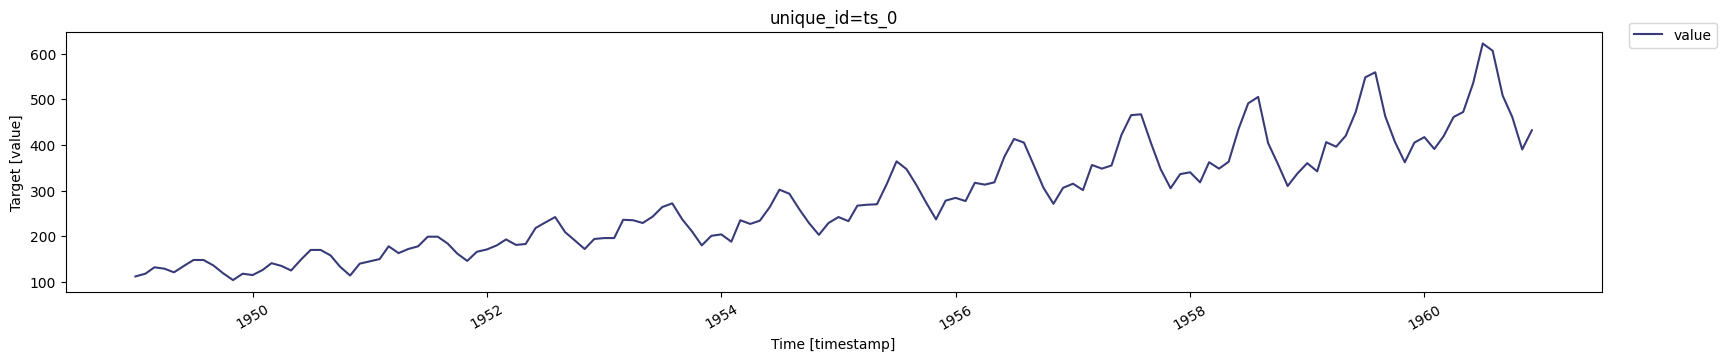

In [27]:
nixtla_client.plot(df, time_col='timestamp', target_col='value')

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


2.6964465118482708


C:\Users\l.ravazzi\AppData\Local\Temp\ipykernel_9632\2539517705.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['timestamp'] = pd.to_datetime(train['timestamp'])
C:\Users\l.ravazzi\AppData\Local\Temp\ipykernel_9632\2539517705.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['timestamp'] = pd.to_datetime(test['timestamp'])


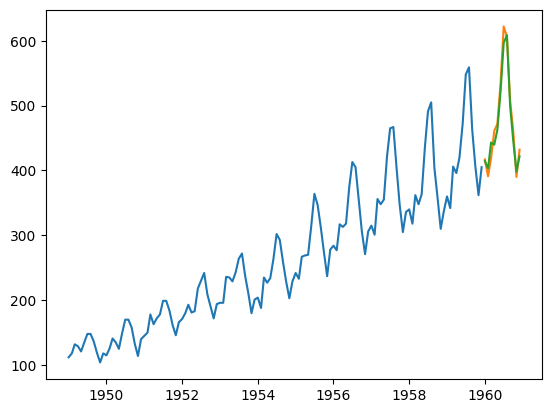

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

timegpt_fcst_df = nixtla_client.forecast(df=train, h=12, freq='MS', time_col='timestamp', target_col='value')

train['timestamp'] = pd.to_datetime(train['timestamp'])
test['timestamp'] = pd.to_datetime(test['timestamp'])
timegpt_fcst_df['timestamp'] = pd.to_datetime(timegpt_fcst_df['timestamp'])

print('\n\nMAPE:', mean_absolute_percentage_error(test.value, timegpt_fcst_df.TimeGPT) * 100, '\n\n')

plt.plot(train.set_index('timestamp')['value'])
plt.plot(test.set_index('timestamp')['value'])
plt.plot(timegpt_fcst_df.set_index('timestamp')['TimeGPT'])

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...




MAPE: 2.3152304110487787 




C:\Users\l.ravazzi\AppData\Local\Temp\ipykernel_9632\789313412.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['timestamp'] = pd.to_datetime(train['timestamp'])
C:\Users\l.ravazzi\AppData\Local\Temp\ipykernel_9632\789313412.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['timestamp'] = pd.to_datetime(test['timestamp'])


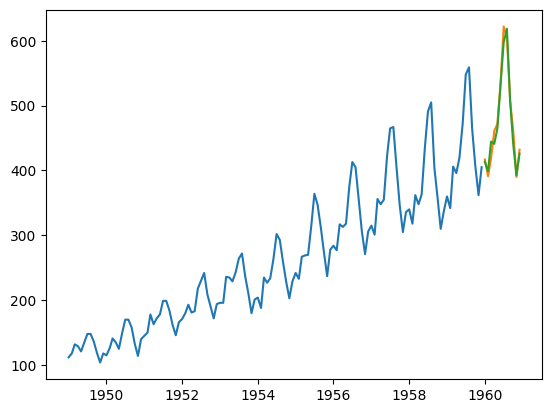

In [61]:
timegpt_fcst_df = nixtla_client.forecast(df=train, h=12, freq='MS', time_col='timestamp', target_col='value', model='timegpt-1-long-horizon')

train['timestamp'] = pd.to_datetime(train['timestamp'])
test['timestamp'] = pd.to_datetime(test['timestamp'])
timegpt_fcst_df['timestamp'] = pd.to_datetime(timegpt_fcst_df['timestamp'])

print('\n\nMAPE:', mean_absolute_percentage_error(test.value, timegpt_fcst_df.TimeGPT) * 100, '\n\n')

plt.plot(train.set_index('timestamp')['value'])
plt.plot(test.set_index('timestamp')['value'])
plt.plot(timegpt_fcst_df.set_index('timestamp')['TimeGPT'])

In [64]:
train = df[:-36]
test = df[-36:]

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...




MAPE: 6.377597233663332 




C:\Users\l.ravazzi\AppData\Local\Temp\ipykernel_9632\3998766326.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['timestamp'] = pd.to_datetime(train['timestamp'])
C:\Users\l.ravazzi\AppData\Local\Temp\ipykernel_9632\3998766326.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['timestamp'] = pd.to_datetime(test['timestamp'])


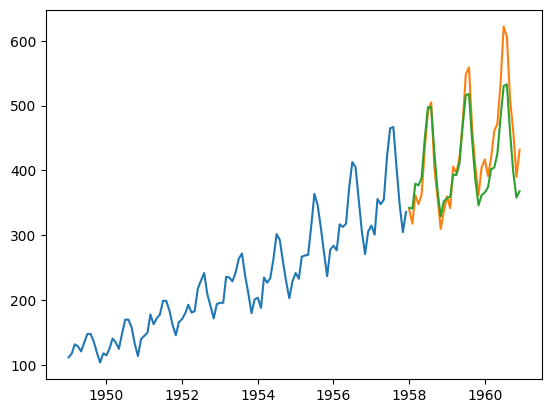

In [66]:
# for longer horizon use timegpt-1-long-horizon
timegpt_fcst_df = nixtla_client.forecast(df=train, h=36, freq='MS', time_col='timestamp', target_col='value')

train['timestamp'] = pd.to_datetime(train['timestamp'])
test['timestamp'] = pd.to_datetime(test['timestamp'])
timegpt_fcst_df['timestamp'] = pd.to_datetime(timegpt_fcst_df['timestamp'])

print('\n\nMAPE:', mean_absolute_percentage_error(test.value, timegpt_fcst_df.TimeGPT) * 100, '\n\n')

plt.plot(train.set_index('timestamp')['value'])
plt.plot(test.set_index('timestamp')['value'])
plt.plot(timegpt_fcst_df.set_index('timestamp')['TimeGPT'])

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...




MAPE: 6.491597643675886 




C:\Users\l.ravazzi\AppData\Local\Temp\ipykernel_9632\2999705429.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['timestamp'] = pd.to_datetime(train['timestamp'])
C:\Users\l.ravazzi\AppData\Local\Temp\ipykernel_9632\2999705429.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['timestamp'] = pd.to_datetime(test['timestamp'])


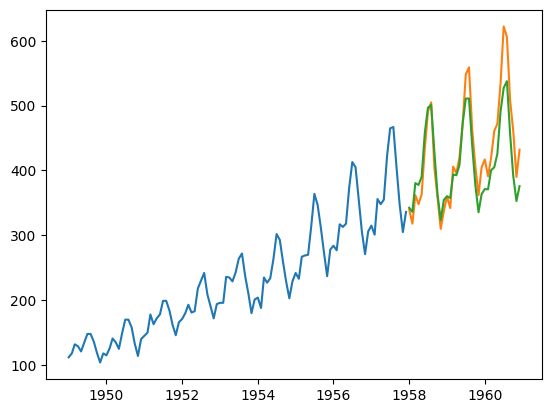

In [68]:
# for longer horizon use timegpt-1-long-horizon
timegpt_fcst_df = nixtla_client.forecast(df=train, h=36, freq='MS', time_col='timestamp', target_col='value', model='timegpt-1-long-horizon')

train['timestamp'] = pd.to_datetime(train['timestamp'])
test['timestamp'] = pd.to_datetime(test['timestamp'])
timegpt_fcst_df['timestamp'] = pd.to_datetime(timegpt_fcst_df['timestamp'])

print('\n\nMAPE:', mean_absolute_percentage_error(test.value, timegpt_fcst_df.TimeGPT) * 100, '\n\n')

plt.plot(train.set_index('timestamp')['value'])
plt.plot(test.set_index('timestamp')['value'])
plt.plot(timegpt_fcst_df.set_index('timestamp')['TimeGPT'])

Si possono usare dei modelli pre-trainati tramite Azure settando le credenziali di accesso in NixtlaClient. 